In [2]:
# Cargar Librerias Necesarias
import pandas as pd  # Para la manipulación y análisis de datos
import numpy as np  # Para operaciones numéricas
import matplotlib.pyplot as plt  # Para crear gráficos y visualizaciones
import seaborn as sns  # Para crear gráficos estadísticos atractivos

#LIbrerias de para implementar modelos de  ciencia de datos
from sklearn import metrics, model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#Libreria para regresión lineal
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
#Lectura de datos en phyton y lo cargamos en la variable Datos

# Lee el archivo CSV
Datos = pd.read_csv(r'C:\Users\Skigdot\Documents\UNAD\PERIODO 16-01\ANÁLISIS DE DATOS\Tarea 3\heart_cleveland_upload.csv')


In [51]:
#Realizamos lectura de los datos para el analisis exploratorio
# Mostramos las primeras 50 filas del DataFrame
print(Datos.head(50))

    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    69    1   0       160   234    1        2      131      0      0.1   
1    69    0   0       140   239    0        0      151      0      1.8   
2    66    0   0       150   226    0        0      114      0      2.6   
3    65    1   0       138   282    1        2      174      0      1.4   
4    64    1   0       110   211    0        2      144      1      1.8   
5    64    1   0       170   227    0        2      155      0      0.6   
6    63    1   0       145   233    1        2      150      0      2.3   
7    61    1   0       134   234    0        0      145      0      2.6   
8    60    0   0       150   240    0        0      171      0      0.9   
9    59    1   0       178   270    0        2      145      0      4.2   
10   59    1   0       170   288    0        2      159      0      0.2   
11   59    1   0       160   273    0        2      125      0      0.0   
12   59    1   0       13

In [52]:
#Descripcion de datos
descripcion = Datos.describe()
print(descripcion)

              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std      0.994914   22.9415

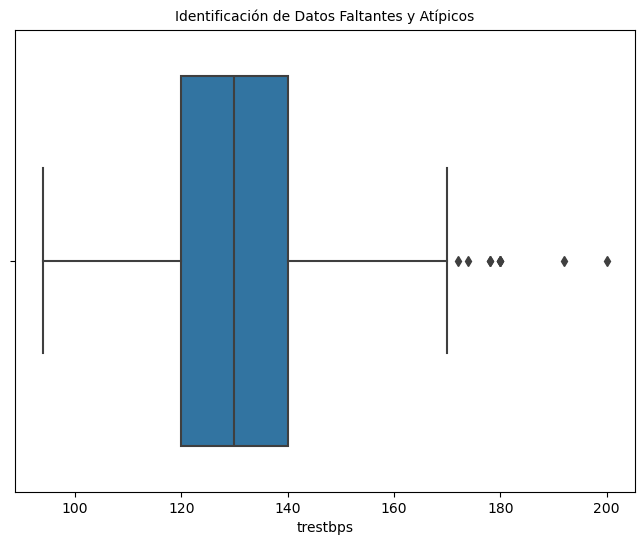

In [67]:
#identificación de Datos Faltantes y Atipicos

# Crear una figura de matplotlib
plt.figure(figsize=(8, 6))  # Tamaño de la figura

# Crear un diagrama de caja (boxplot) con Seaborn
sns.boxplot(x='trestbps', data=Datos) 

# Agregar un título al gráfico con fuente de tamaño 10
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

# Mostrar el gráfico
plt.show()

In [54]:
# Revisión de datos faltantes
columnas_nuevas = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']

# Conteo de registros con cero en cada nueva columna
registros_con_cero = {}
for columna in columnas_nuevas:
    # Convertir a string y contar registros con '0'
    registros_con_cero[columna] = (Datos[columna].astype(str) == '0').sum()

# Mostrar resultados
for columna, cantidad in registros_con_cero.items():
    print(f"Cantidad de registros con cero en la columna '{columna}': {cantidad}")

Cantidad de registros con cero en la columna 'age': 0
Cantidad de registros con cero en la columna 'sex': 96
Cantidad de registros con cero en la columna 'cp': 23
Cantidad de registros con cero en la columna 'trestbps': 0
Cantidad de registros con cero en la columna 'chol': 0
Cantidad de registros con cero en la columna 'fbs': 254
Cantidad de registros con cero en la columna 'restecg': 147
Cantidad de registros con cero en la columna 'thalach': 0
Cantidad de registros con cero en la columna 'exang': 200
Cantidad de registros con cero en la columna 'oldpeak': 0
Cantidad de registros con cero en la columna 'slope': 139
Cantidad de registros con cero en la columna 'ca': 174
Cantidad de registros con cero en la columna 'thal': 164
Cantidad de registros con cero en la columna 'condition': 160


In [63]:
#Remplazar todos los ceros o espacios nulos con el valor medio de las columnas

Datos['sex']=Datos['sex'].replace(0,Datos['sex'].mean())
Datos['cp']=Datos['sex'].replace(0,Datos['cp'].mean())
Datos['fbs']=Datos['sex'].replace(0,Datos['fbs'].mean())
Datos['restecg']=Datos['sex'].replace(0,Datos['restecg'].mean())
Datos['exang']=Datos['sex'].replace(0,Datos['exang'].mean())
Datos['slope']=Datos['sex'].replace(0,Datos['slope'].mean())
Datos['ca']=Datos['sex'].replace(0,Datos['ca'].mean())
Datos['thal']=Datos['sex'].replace(0,Datos['thal'].mean())
Datos['condition']=Datos['sex'].replace(0,Datos['condition'].mean())

In [64]:
# Revisión nuevamente de datos faltantes
columnas_nuevas = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']

# Conteo de registros con cero en cada nueva columna
registros_con_cero = {}
for columna in columnas_nuevas:
    # Convertir a string y contar registros con '0'
    registros_con_cero[columna] = (Datos[columna].astype(str) == '0').sum()

# Mostrar resultados
for columna, cantidad in registros_con_cero.items():
    print(f"Cantidad de registros con cero en la columna '{columna}': {cantidad}")

Cantidad de registros con cero en la columna 'age': 0
Cantidad de registros con cero en la columna 'sex': 0
Cantidad de registros con cero en la columna 'cp': 0
Cantidad de registros con cero en la columna 'trestbps': 0
Cantidad de registros con cero en la columna 'chol': 0
Cantidad de registros con cero en la columna 'fbs': 0
Cantidad de registros con cero en la columna 'restecg': 0
Cantidad de registros con cero en la columna 'thalach': 0
Cantidad de registros con cero en la columna 'exang': 0
Cantidad de registros con cero en la columna 'oldpeak': 0
Cantidad de registros con cero en la columna 'slope': 0
Cantidad de registros con cero en la columna 'ca': 0
Cantidad de registros con cero en la columna 'thal': 0
Cantidad de registros con cero en la columna 'condition': 0


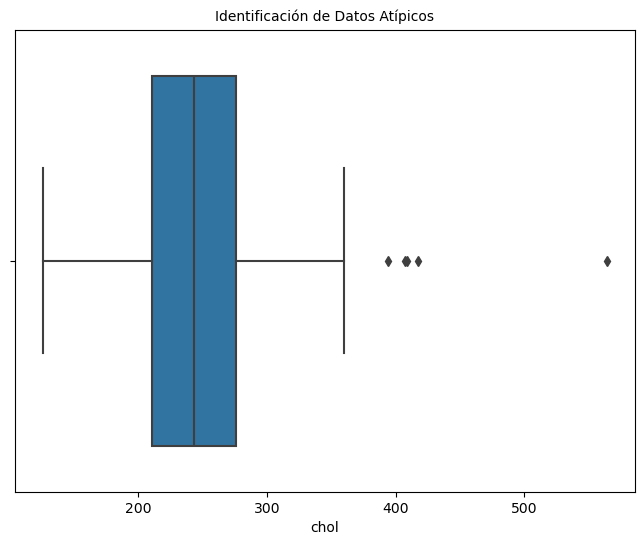

In [69]:
#identificación de Datos Faltantes y Atipicos

# Crear una figura de matplotlib
plt.figure(figsize=(8, 6))  # Tamaño de la figura

# Crear un diagrama de caja (boxplot) con Seaborn
sns.boxplot(x='chol', data=Datos) 

# Agregar un título al gráfico con fuente de tamaño 10
plt.title('Identificación de Datos Atípicos', fontsize=10)

# Mostrar el gráfico
plt.show()

In [72]:
#Conteo de datos atipicos

nivel_minimo=200
nivel_maximo=500
Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(Total_Atipicos))

El total de datos atipicos es 49


In [74]:
# Filtrar datos atipicos

Datos=Datos [(Datos['chol']<nivel_maximo)&(Datos['chol']>nivel_minimo)]

In [75]:
# Validar si se removieron los datos atipicos

Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(Total_Atipicos))

El total de datos atipicos es 0


In [77]:
# Revision del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        247 non-null    int64  
 1   sex        247 non-null    float64
 2   cp         247 non-null    float64
 3   trestbps   247 non-null    int64  
 4   chol       247 non-null    int64  
 5   fbs        247 non-null    float64
 6   restecg    247 non-null    float64
 7   thalach    247 non-null    int64  
 8   exang      247 non-null    float64
 9   oldpeak    247 non-null    float64
 10  slope      247 non-null    float64
 11  ca         247 non-null    float64
 12  thal       247 non-null    float64
 13  condition  247 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 28.9 KB


In [78]:
# Total de personas con Alto Colesterol

Datos['chol'].value_counts()

chol
234    6
212    5
254    5
204    5
269    5
      ..
321    1
215    1
322    1
237    1
247    1
Name: count, Length: 118, dtype: int64

In [79]:
Datos[['chol']].head(40)

,chol
0,234
1,239
2,226
3,282
4,211
5,227
6,233
7,234
8,240
9,270


In [91]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en características (X) y variable objetivo (Y)
X = Datos.drop('chol', axis=1)  # Características
Y = Datos['chol']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
# Usaremos un 75% para entrenamiento y un 25% para prueba
# También estableceremos una semilla aleatoria para reproducibilidad
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Ahora tienes X_train y Y_train para el conjunto de entrenamiento, y X_test y Y_test para el conjunto de prueba

In [92]:
print (X_train)

     age       sex        cp  trestbps       fbs   restecg  thalach     exang  \
121   51  0.676768  0.676768       140  0.676768  0.676768      142  0.676768   
238   56  0.676768  0.676768       134  0.676768  0.676768      150  0.676768   
153   37  1.000000  1.000000       130  1.000000  1.000000      187  1.000000   
81    67  0.676768  0.676768       152  0.676768  0.676768      172  0.676768   
241   55  1.000000  1.000000       160  1.000000  1.000000      145  1.000000   
..   ...       ...       ...       ...       ...       ...      ...       ...   
126   50  1.000000  1.000000       140  1.000000  1.000000      163  1.000000   
16    52  1.000000  1.000000       152  1.000000  1.000000      178  1.000000   
108   54  1.000000  1.000000       120  1.000000  1.000000      147  1.000000   
216   58  1.000000  1.000000       128  1.000000  1.000000      130  1.000000   
122   51  0.676768  0.676768       130  0.676768  0.676768      149  0.676768   

     oldpeak     slope     

In [93]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [94]:
print (Y_test)

38     236.0
6      233.0
219    225.0
100    224.0
189    294.0
       ...  
200    258.0
113    201.0
187    267.0
87     335.0
96     218.0
Name: chol, Length: 62, dtype: float64


In [95]:
print (Prediccion)

[230. 282. 228. 250. 269. 269. 327. 234. 298. 226. 282. 234. 298. 229.
 269. 204. 204. 282. 274. 234. 204. 265. 298. 229. 298. 269. 282. 226.
 226. 240. 204. 298. 204. 234. 283. 250. 234. 298. 204. 236. 204. 226.
 204. 234. 282. 204. 234. 269. 230. 282. 269. 236. 282. 282. 204. 269.
 283. 254. 283. 254. 234. 254.]


In [102]:
# Paso 1: Dividir el conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 2: Entrenar un modelo (por ejemplo, un clasificador)
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)

# Paso 3: Evaluar el rendimiento del modelo
from sklearn.metrics import classification_report
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       201.0       0.00      0.00      0.00       0.0
       203.0       0.00      0.00      0.00       0.0
       204.0       0.00      0.00      0.00       0.0
       205.0       0.00      0.00      0.00       0.0
       208.0       0.00      0.00      0.00       1.0
       209.0       0.00      0.00      0.00       1.0
       210.0       0.00      0.00      0.00       1.0
       211.0       0.00      0.00      0.00       1.0
       212.0       0.00      0.00      0.00       2.0
       213.0       0.00      0.00      0.00       2.0
       215.0       0.00      0.00      0.00       0.0
       217.0       0.00      0.00      0.00       1.0
       219.0       0.00      0.00      0.00       1.0
       221.0       0.00      0.00      0.00       1.0
       222.0       0.00      0.00      0.00       0.0
       223.0       0.00      0.00      0.00       1.0
       224.0       0.00      0.00      0.00       1.0
       225.0       0.00    

C:\Users\Skigdot\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Skigdot\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Skigdot\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Skigdot\anaconda3\Lib\site-packages\sklearn\metr

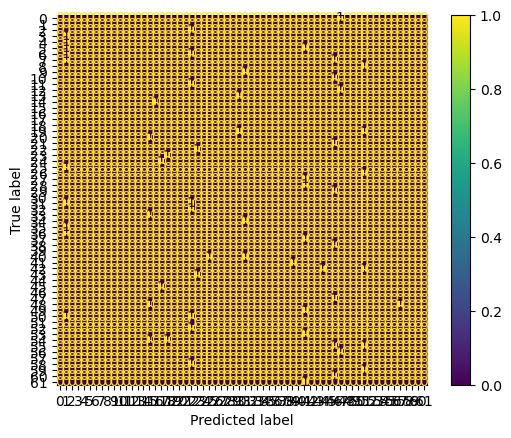

In [103]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

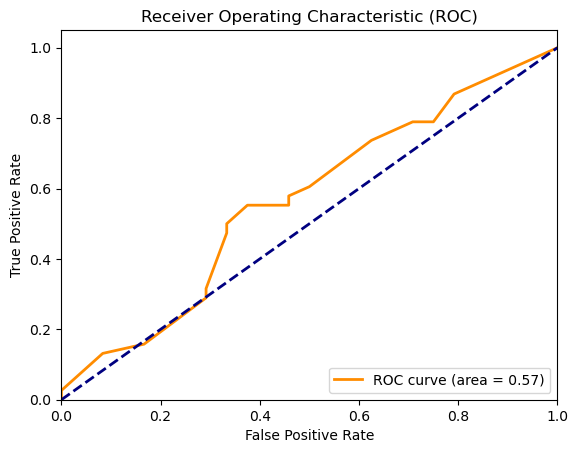

In [122]:
# Definir umbral para colesterol alto y bajo
umbral = 240

# Convertir valores continuos en binarios
y_binario = np.where(Y_test >= umbral, 1, 0)
prediccion_binaria = np.where(Prediccion >= umbral, 1, 0)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_binario, Prediccion)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()